---


# **Task 1 - Iris Flowers Classification ML Project**

---







---
# **Name : Kaviya Sri A.N**
---

## **Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

## **Loading the dataset**

In [3]:
head = ['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width','Type']
data = pd.read_csv("iris.data",names = head)

### **Exploring the Dataset**

In [4]:
data.head()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Type
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## **To find the size of the dataset**

In [6]:
data.shape

(150, 5)

In [7]:
data.dtypes

Sepal-Length    float64
Sepal-Width     float64
Petal-Length    float64
Petal-Width     float64
Type             object
dtype: object

## **Checking for null values in the dataset**

In [8]:
data.info

<bound method DataFrame.info of      Sepal-Length  Sepal-Width  Petal-Length  Petal-Width            Type
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [9]:
data.isnull().sum()

Sepal-Length    0
Sepal-Width     0
Petal-Length    0
Petal-Width     0
Type            0
dtype: int64

## **Statistical Analysis on the data**

In [10]:
data.describe()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Getting different species of flowers**

In [11]:
types = data['Type'].unique()
types = types.tolist()
types

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Three types of flowers are present in the dataset.

In [12]:
data['Type'].value_counts().to_frame()

,Type
Iris-virginica,50
Iris-versicolor,50
Iris-setosa,50


There are 50 values for each types of flower.

## **Data Visualisation**

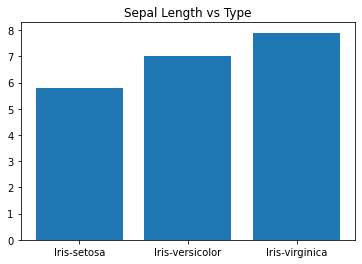

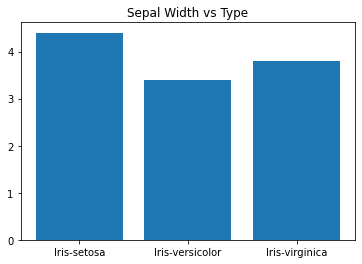

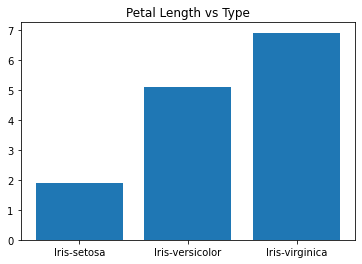

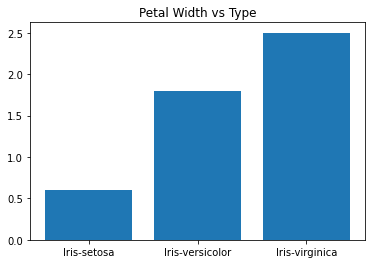

In [13]:
plt.bar(data['Type'],data['Sepal-Length'])
plt.title("Sepal Length vs Type")
plt.show()
plt.bar(data['Type'],data['Sepal-Width'])
plt.title("Sepal Width vs Type")
plt.show()
plt.bar(data['Type'],data['Petal-Length'])
plt.title("Petal Length vs Type")
plt.show()
plt.bar(data['Type'],data['Petal-Width'])
plt.title("Petal Width vs Type")
plt.show()

## **Pair Plot for the data**

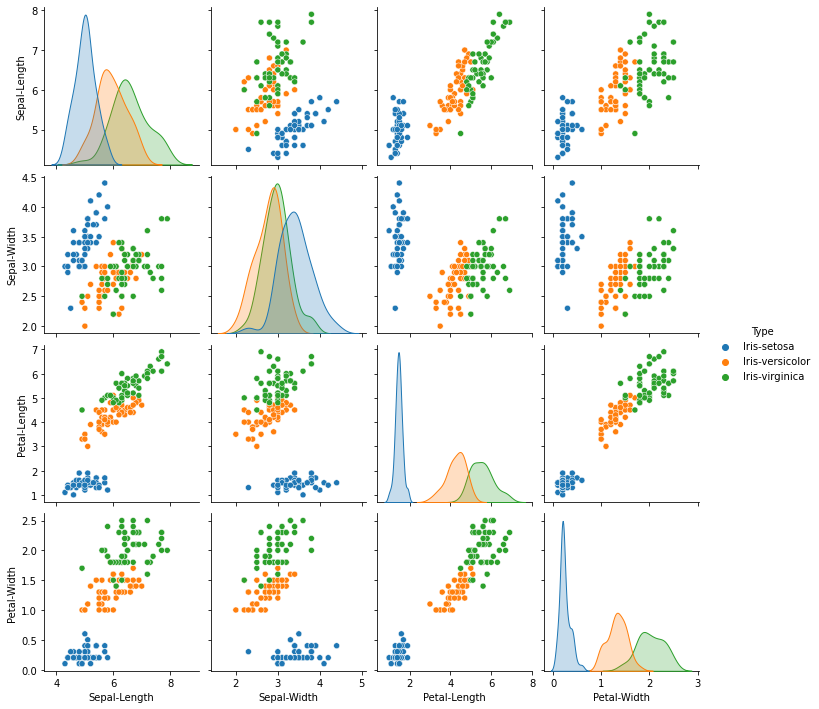

In [14]:
sns.pairplot(data,hue = 'Type')
plt.show()

## **Correlation between the dataset**

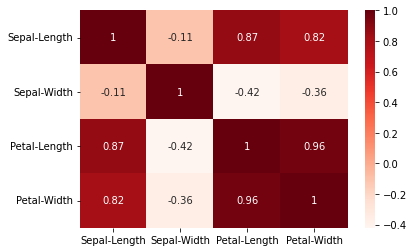

In [15]:
data1 = data.drop('Type',axis = 1)
corr_data = data1.corr()
sns.heatmap(corr_data,annot = True,cmap='Reds')
plt.show()

## **Data Preparation**

In [16]:
x = data.iloc[:,0:4]
x.head()

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y=data['Type'].to_frame()
y

,Type
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


## **Normalization of Data**

In [18]:
from sklearn import preprocessing
std = preprocessing.StandardScaler()
x = std.fit_transform(x)
x[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

## **Splitting the Dataset into Train and Test sets**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)
print("X Train : "+str(x_train.shape))
print("X Test : "+str(x_test.shape))
print("Y Train : "+str(y_train.shape))
print("Y Test : "+str(y_test.shape))

X Train : (105, 4)
X Test : (45, 4)
Y Train : (105, 1)
Y Test : (45, 1)


## **Model Creation**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

## **Finding the best K value for the model**

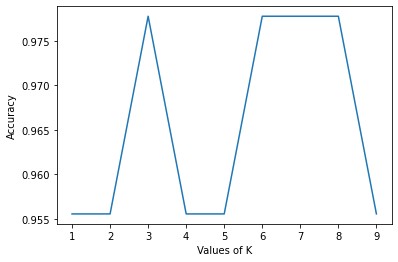

From the plot, the model giving maximum accuracy for K is  3


In [21]:
best_K = 0
best_acc = 0.0
acc_arr = np.zeros((9,))
for k in range(1,10):
    KNN_Temp = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    y2_result = KNN_Temp.predict(x_test)
    acc_score = accuracy_score(y_test,y2_result)
    acc_arr[k-1] = acc_score
    if(acc_score > best_acc):
        best_K = k
        KNN = KNN_Temp
        best_acc = acc_score

plt.plot(range(1,10),acc_arr)
plt.xlabel("Values of K")
plt.ylabel("Accuracy")
plt.show()
print("From the plot, the model giving maximum accuracy for K is ",best_K)

## **Prediction using Classification Model**

In [22]:
KNN = KNeighborsClassifier(n_neighbors=best_K)
KNN.fit(x_train,y_train)
y_predict = KNN.predict(x_test)
y_predict

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

## **Evaluation of the created model**

In [23]:
acc = accuracy_score(y_predict,y_test)
print("Accuracy of the KNN Model : "+str(acc*100)+" %")

Accuracy of the KNN Model : 97.77777777777777 %


In [24]:
cm = confusion_matrix(y_test.values,y_predict)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [25]:
lst = data['Type'].unique().tolist()
data_cm = pd.DataFrame(data=cm,index=lst,columns=lst)
data_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,18,0
Iris-virginica,0,1,12


The Accuracy of the KNN Model is **97.7%**

## **CONCLUSION**



*   **KNN Algorithm** has been used to predict the values accurately.
*   The accuracy of the KNN Algorithm is **97.7%**

